This dataset is a compilation of 2.7 million news headlines published by Times of India from 2001 to 2017, 17 years.

A majority of the data is focusing on Indian local news including national, city level and entertainment.

Start Date: 2001-01-01 End Date: 2017-12-31

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import spacy
from wordcloud import WordCloud

In [3]:
df  = pd.read_csv("india-news-headlines.csv", dtype={'publish_date': object})

In [4]:
df.head(5)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,bollywood,Raju Chacha
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?


In [5]:
df['publish_month'] = df.publish_date.str[:6]

In [6]:
df['publish_year'] = df.publish_date.str[:4]

In [7]:
df['publish_month_only'] = df.publish_date.str[4:6]

In [8]:
df['publish_day_only'] = df.publish_date.str[6:8]

In [9]:
df['dt_date'] = pd.to_datetime(df['publish_date'], format='%Y%m%d')

In [10]:
df['dt_month'] = pd.to_datetime(df['publish_month'], format='%Y%m')

In [11]:
df.head(5)

,publish_date,headline_category,headline_text,publish_month,publish_year,publish_month_only,publish_day_only,dt_date,dt_month
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,200101,2001,01,01,2001-01-01,2001-01-01
1,20010102,bollywood,Raju Chacha,200101,2001,01,02,2001-01-02,2001-01-01
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,200101,2001,01,02,2001-01-02,2001-01-01
3,20010102,unknown,Fissures in Hurriyat over Pak visit,200101,2001,01,02,2001-01-02,2001-01-01
4,20010102,unknown,America's unwanted heading for India?,200101,2001,01,02,2001-01-02,2001-01-01


In [12]:
#Daily plot
grp_date = df.groupby(['dt_date'])['headline_text'].count()

In [13]:
#Monthly plot
grp_month = df.groupby(['dt_month'])['headline_text'].count()

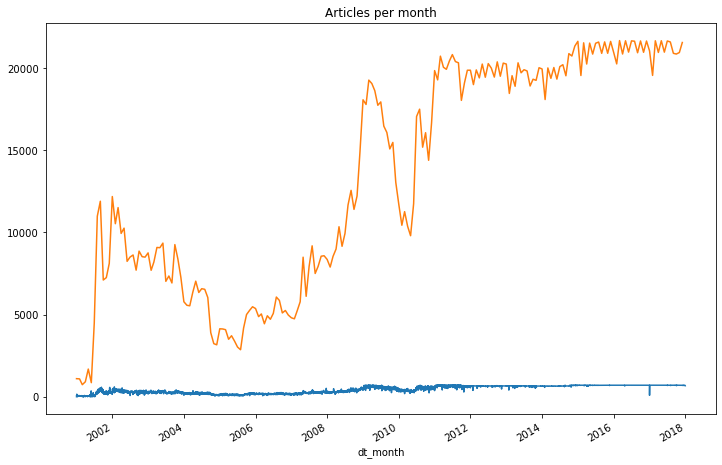

In [14]:
ts = pd.Series(grp_date)
ts.plot(kind='line', figsize=(12,8),title='Articles per day')
#plt.show()

ts = pd.Series(grp_month)
ts.plot(kind='line', figsize=(12,8),title='Articles per month')
plt.savefig('fig1.png')
plt.show()

In [15]:
years=df['publish_year'].unique().tolist()
print (years)

['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


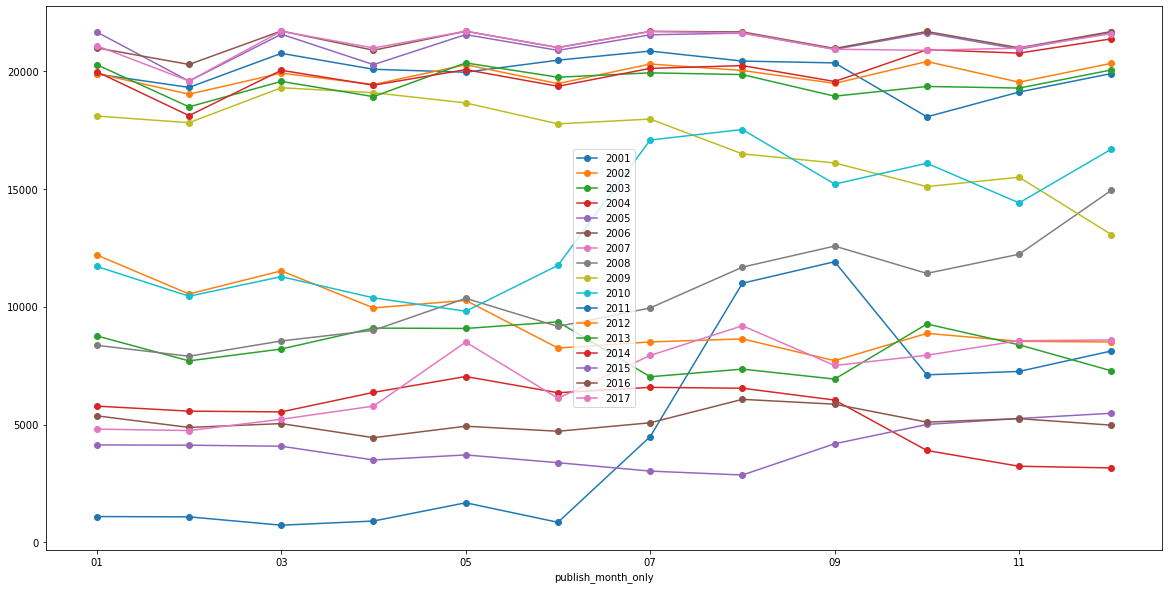

In [16]:
#Year slice plotting
for year in years:
    yr_slice = df.loc[df.publish_year==year]
    grp_month = yr_slice.groupby(['publish_month_only'])['headline_text'].count()
    month_ts = pd.Series(grp_month)
    month_ts.plot(kind='line', figsize=(20,10), style='o-', legend=True, label=year)  
plt.savefig('fig2.png')
plt.show()

Coverage by Cities

Volume of coverage per city

In [17]:
def label_plot(x, y, title):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

In [18]:
data_cities = df[df['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]

In [19]:
data_cities.head(4)

,publish_date,headline_category,headline_text,publish_month,publish_year,publish_month_only,publish_day_only,dt_date,dt_month
129,20010104,city.bengaluru,He's not so inscrutable,200101,2001,01,04,2001-01-04,2001-01-01
130,20010104,city.bengaluru,Three in race for chief secy's post,200101,2001,01,04,2001-01-04,2001-01-01
131,20010104,city.delhi,DPCC stages Nyay rally,200101,2001,01,04,2001-01-04,2001-01-01
132,20010104,city.patna,Druggists' stir leads to shortage of medicines,200101,2001,01,04,2001-01-04,2001-01-01


In [20]:
data_cities['city_name'] = data_cities.headline_category.str[5:]

In [21]:
city_list = data_cities['city_name'].unique().tolist()

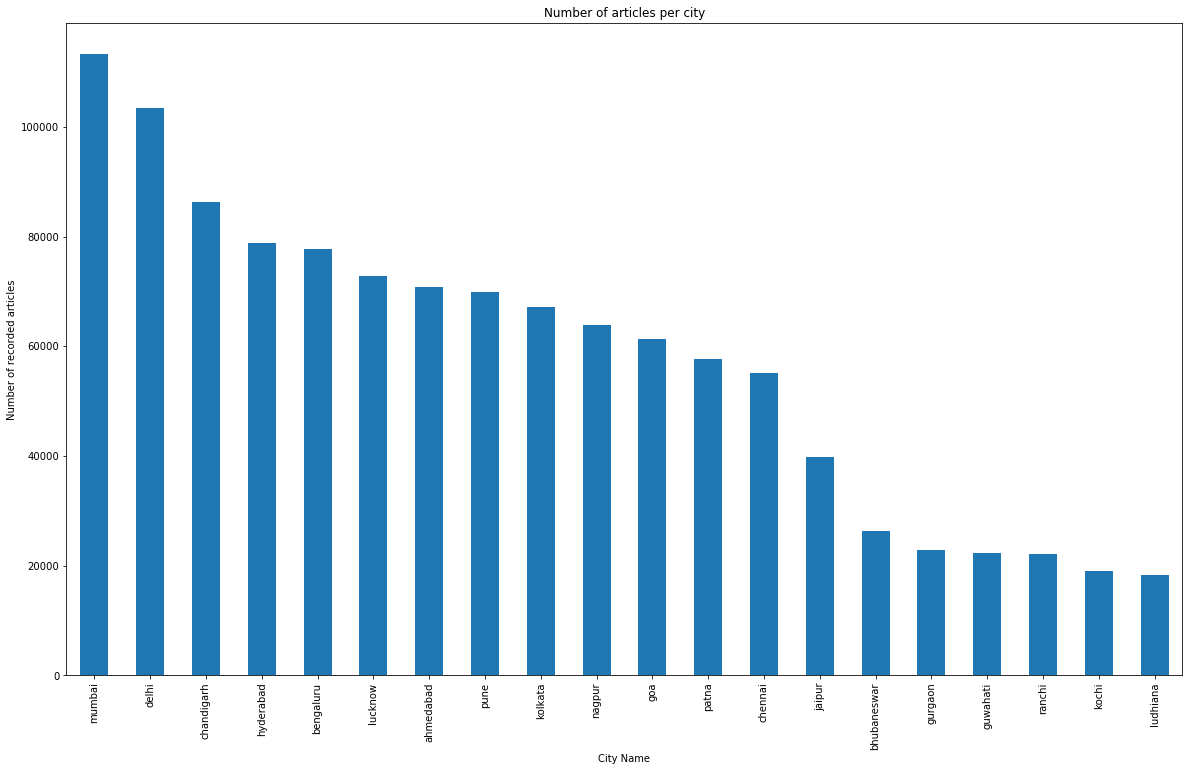

In [22]:
#Bar chart of covrage by cities in descending order
grp_city = data_cities.groupby(['city_name'])['headline_text'].count().nlargest(20)
ts = pd.Series(grp_city)
ts.plot(kind='bar', figsize=(20,12))
label_plot('City Name', 'Number of recorded articles', 'Number of articles per city')
plt.savefig('fig3.png')
plt.show()

## Share of Articles By Top 40 Covered Cities

In [23]:
#City slice plotting
df_city = df[df['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]

In [24]:
df_city['city_name'] = df_city.headline_category.str[5:]

In [25]:
city_list=df_city['city_name'].unique().tolist()

In [26]:
print (city_list)

['bengaluru', 'delhi', 'patna', 'ahmedabad', 'thiruvananthapuram', 'chandigarh', 'mumbai', 'pune', 'kolkata', 'lucknow', 'hyderabad', 'nagpur', 'chennai', 'jaipur', 'goa', 'thane', 'hubballi', 'mangaluru', 'mysuru', 'rajkot', 'surat', 'vadodara', 'allahabad', 'kanpur', 'varanasi', 'ludhiana', 'guwahati', 'bhubaneswar', 'ranchi', 'banglore', 'gurgaon', 'coimbatore', 'noida', 'madurai', 'indore', 'kochi', 'kozhikode', 'bhopal', 'nashik', 'raipur', 'aurangabad', 'visakhapatnam', 'kolhapur', 'trichy', 'puducherry', 'bareilly', 'dehradun', 'meerut', 'agra', 'vijayawada', 'jamshedpur', 'amritsar', 'cuttack', 'imphal', 'jind', 'shillong', 'shimla', 'agartala', 'jammu', 'faridabad', 'rajahmundry', 'salem', 'srinagar', 'erode', 'ghaziabad', 'itanagar', 'ajmer', 'gaya', 'kohima', 'jodhpur', 'udaipur', 'amaravati']


In [27]:
#bar plot of all cities
grp_city = df_city.groupby(['city_name'])['headline_text'].count().nlargest(50)
ts = pd.Series(grp_city)
#ts.plot(kind='bar', figsize=(20,10),title='Articles per city')
#plt.show()

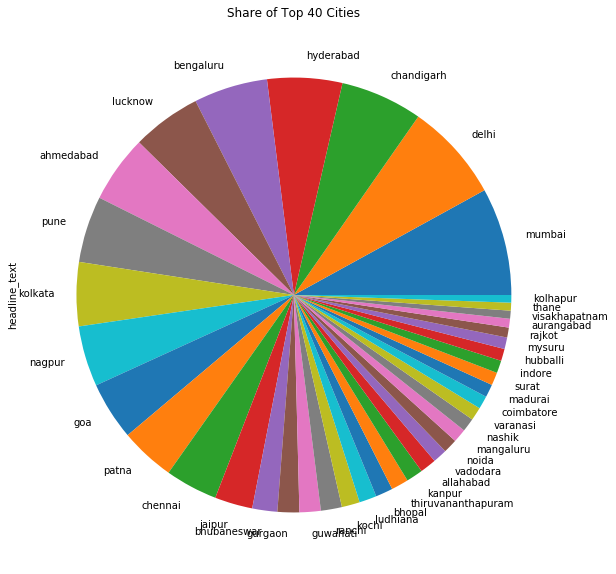

In [28]:
#pie chart of top 40 cities
grp_top_city = df_city.groupby(['city_name'])['headline_text'].count().nlargest(40)
ts = pd.Series(grp_top_city)
ts.plot(kind='pie', figsize=(10,10),title='Share of Top 40 Cities')
plt.savefig('fig4.png')
plt.show()

Not so surprisingly, Mumbai and Delhi lead the list. Following these two cities, the decrease is fairly uniform until the sharp drop in coverage from Chennai to Jaipur. We wanted to check if the coverage of a particular city has a relationship with its population density, and ended up with the following chart:

Year-wise coverage for cities

In [29]:
df['publish_date'] = pd.to_datetime(df['publish_date'])

In [30]:
df['year'] = df['publish_date'].apply(lambda x: (x.microsecond)//10)

In [31]:
df = df.drop('publish_date', axis = 1)

In [32]:
df = df.reset_index(drop=True)

In [33]:
data_cities = data_cities.reset_index(drop=True)

In [34]:
data_cities['year'] = df['year']

In [35]:
data_cities.columns

Index(['publish_date', 'headline_category', 'headline_text', 'publish_month',
       'publish_year', 'publish_month_only', 'publish_day_only', 'dt_date',
       'dt_month', 'city_name', 'year'],
      dtype='object')

In [36]:
data_cities = data_cities.drop('headline_category', axis = 1)

In [37]:
data_cities2 = data_cities
data_cities2['headline_text'] = 1

# Topic-wise Coverage

In [38]:
data_non_cities = df[~df['headline_category'].str.contains('city', regex=False)]

In [39]:
non_cities = data_non_cities.groupby(['headline_category'])['headline_text'].count()

In [40]:
non_cities = non_cities.drop('unknown')
non_cities = non_cities.drop('removed')
non_cities = non_cities.drop('top-stories')
non_cities['tech'] += non_cities['tech.tech-news']
non_cities = non_cities.drop('tech.tech-news')
non_cities = non_cities.nlargest(30)

In [41]:
ts = pd.Series(non_cities)

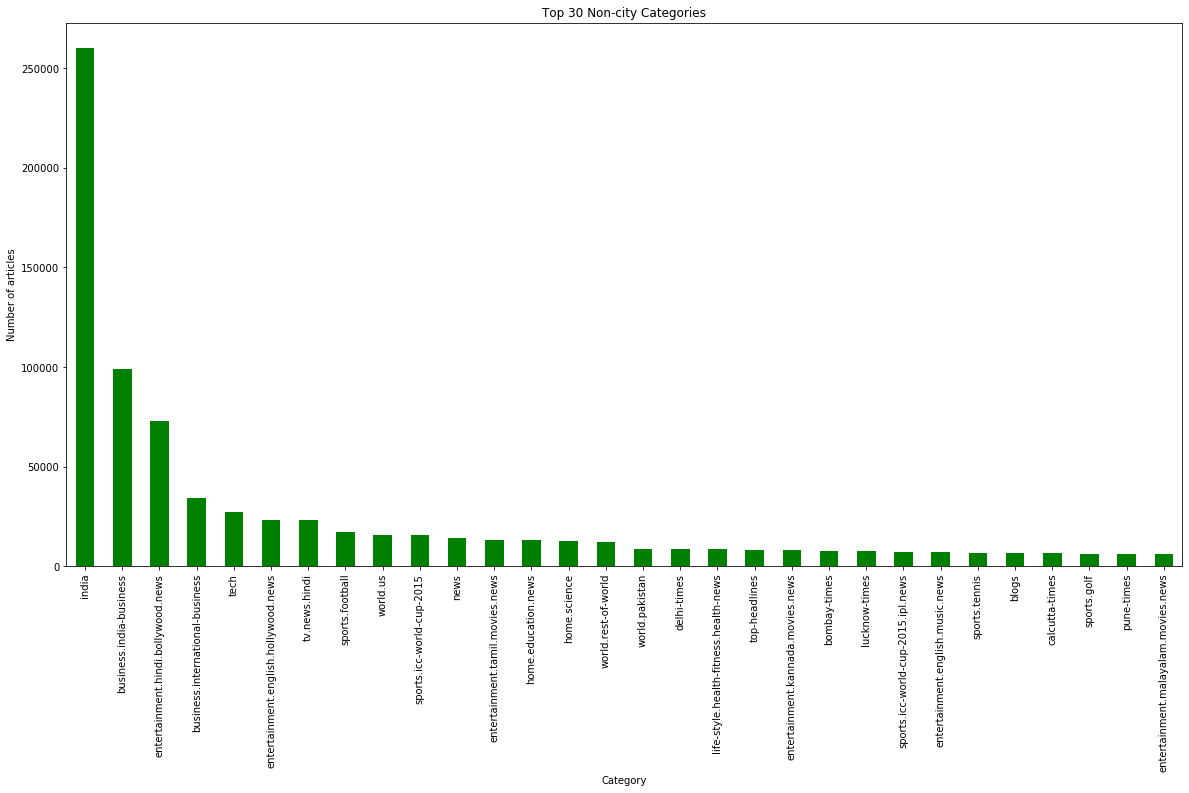

In [42]:
ts.plot(kind='bar', figsize=(20,10), color='green')
label_plot('Category', 'Number of articles', 'Top 30 Non-city Categories')
plt.savefig('fig7.png')
plt.show()

It's no surprise that news concerning India is the most published since the publication is based in India. Interestingly, Bollywood is the third-most covered topic by TOI. In fact, it's eye-opening how Bollywood is given more coverage than every other topic except for Indian Business.

Of news concentrated on other countries, news about the US is the most prevalent followed by that about Pakistan. It is also interesting to note that the ICC World Cup 2015 (Cricket) was more talked about than anything related to football in all the years combined.

# Sentiment Analysis

In [43]:
def analyze_polarity(headline):
    result = TextBlob(headline)
    if result.sentiment.polarity > 0:
        return 1
    elif result.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [44]:
df['Result'] = np.array([analyze_polarity(headline) for headline in df['headline_text']])

In [45]:
positive_headlines = [ head for index, head in enumerate(df['headline_text']) if df['Result'][index] > 0]

In [47]:
unbiased_headlines = [ head for index, head in enumerate(df['headline_text']) if df['Result'][index] == 0]

In [48]:
negative_headlines = [ head for index, head in enumerate(df['headline_text']) if df['Result'][index] < 0]

## Overall Sentiment Distribution

In [49]:
o_pos = len(positive_headlines)*100/len(df['headline_text'])
o_neg = len(negative_headlines)*100/len(df['headline_text'])
o_un = len(unbiased_headlines)*100/len(df['headline_text'])

In [50]:
print('Positive Headlines: ' + str(o_pos) + '\nNegative Headlines: ' + str(o_neg) + '\nUnbiased Headlines: ' + str(o_un))

Positive Headlines: 18.050915679405822
Negative Headlines: 11.711571406323003
Unbiased Headlines: 70.23751291427118


As is evident, most of the headlines published by Times of India are unbiased in their sentence structure. The ratio of the percentage of positive to negative headlines is 1.5. This is not significantly large and can be ignored.

## Sentiment Distribution by Major National Political Parties

The following are some major national political parties in India:

Bhartiya Janata Party (BJP)
Indian National Congress (Congress)
Bahujan Samaj Party (BSP)

In [53]:
def party_data(party_name):
    """
    Returns a dataset that contains data relevant to the given party name
    
    The procedure looks for the given party name in the headlines of the entire dataset
    and filters the dataset accordingly to create a new dataset
    
    Parameter party_name: Name of the party relevant to which the dataset is to be created
    Precondition: Non-empty String
    """
    return df[df['headline_text'].str.contains(party_name)]

In [54]:
frames_bjp = [party_data('bjp'), party_data('BJP')]
data_bjp = pd.concat(frames_bjp)

frames_congress = [party_data('congress'), party_data('Congress')]
data_congress = pd.concat(frames_congress)

frames_bsp = [party_data('bsp'), party_data('BSP')]
data_bsp = pd.concat(frames_bsp)

In [55]:
print('1. ' + str(len(data_bjp)) + '\n2. ' + str(len(data_congress)) + '\n3. ' + str(len(data_bsp)))

1. 38301
2. 22152
3. 4217


### Find the positive sentiment and negative based on parties?